# Example of reading and plotting CloudSat radar reflectivity data

Import standard scientific packages

In [1]:
%pwd

'/home/jovyan/cloudsat_polarlows'

In [2]:
!conda env create -f environment.yml

Solving environment: done

qt-5.12.9            | 99.5 MB   | ##################################### | 100% 
ipython-7.16.1       | 1.1 MB    | ##################################### | 100% 
testpath-0.4.4       | 85 KB     | ##################################### | 100% 
notebook-6.2.0       | 6.2 MB    | ##################################### | 100% 
pyqt-5.12.3          | 21 KB     | ##################################### | 100% 
libev-4.33           | 104 KB    | ##################################### | 100% 
libffi-3.3           | 51 KB     | ##################################### | 100% 
libcurl-7.71.1       | 312 KB    | ##################################### | 100% 
cycler-0.10.0        | 9 KB      | ##################################### | 100% 
pyqt5-sip-4.19.18    | 310 KB    | ##################################### | 100% 
ncurses-6.2          | 985 KB    | ##################################### | 100% 
krb5-1.17.2          | 1.4 MB    | ##################################### | 100% 
j

six-1.15.0           | 14 KB     | ##################################### | 100% 
pthread-stubs-0.4    | 5 KB      | ##################################### | 100% 
nss-3.60             | 2.1 MB    | ##################################### | 100% 
pickleshare-0.7.5    | 9 KB      | ##################################### | 100% 
wcwidth-0.2.5        | 33 KB     | ##################################### | 100% 
nbclient-0.5.1       | 60 KB     | ##################################### | 100% 
typing_extensions-3. | 25 KB     | ##################################### | 100% 
decorator-4.4.2      | 11 KB     | ##################################### | 100% 
giflib-5.2.1         | 77 KB     | ##################################### | 100% 
boost-cpp-1.74.0     | 16.3 MB   | ##################################### | 100% 
ptyprocess-0.7.0     | 16 KB     | ##################################### | 100% 
gst-plugins-base-1.1 | 6.8 MB    | ##################################### | 100% 
traitlets-4.3.3      | 133 K

done
#
# To activate this environment, use
#
#     $ conda activate cloudsat
#
# To deactivate an active environment, use
#
#     $ conda deactivate



In [3]:
!conda activate cloudsat


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [4]:
!conda init bash

no change     /srv/conda/condabin/conda
no change     /srv/conda/bin/conda
no change     /srv/conda/bin/conda-env
no change     /srv/conda/bin/activate
no change     /srv/conda/bin/deactivate
no change     /srv/conda/etc/profile.d/conda.sh
no change     /srv/conda/etc/fish/conf.d/conda.fish
no change     /srv/conda/shell/condabin/Conda.psm1
no change     /srv/conda/shell/condabin/conda-hook.ps1
no change     /srv/conda/lib/python3.8/site-packages/xontrib/conda.xsh
no change     /srv/conda/etc/profile.d/conda.csh
modified      /home/jovyan/.bashrc

==> For changes to take effect, close and re-open your current shell. <==



In [5]:
!source ~/.bashrc

In [7]:
!source activate cloudsat

In [8]:
import cartopy.crs as ccrs  # for plotting in cartographic projection
import matplotlib as mpl
import matplotlib.pyplot as plt  # the plotting interface
import numpy as np  # for numerical array computations
from pathlib import Path  # object-oriented file paths

Also import local modules for reading CloudSat data and interpolating them to a regular grid

In [22]:
from cloudsat_read import get_geodata, read_data
import utils

Define the input directory by creating a `Path`-like object pointing to the local `data/` directory

In [10]:
input_dir = Path('data')

Define a path to the input file

In [11]:
fname = input_dir / '2013085084411_36761_CS_2B-GEOPROF_GRANULE_P_R04_E06.h5'

Read geo data of the CloudSat pass from the input file using the function from the `cloudsat_read.py` script:
* longitude
* latitude
* height
* time
* surface elevation

## Reading data

In [14]:
import h5py

In [15]:
filename = fname

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['2B-GEOPROF', 'HDF4_DIMGROUP']>


In [23]:
cloudsat_lons, cloudsat_lats, cloudsat_height, cloudsat_time, elev = get_geodata(fname, return_list=True)
elev = elev * 1e-3

AttributeError: 'Dataset' object has no attribute 'value'

Print out time array

In [16]:
cloudsat_time

NameError: name 'cloudsat_time' is not defined

Read radar reflectivity data, to be plotted later

In [17]:
cldst_radar = read_data(fname)

AttributeError: 'Dataset' object has no attribute 'value'

## Creating simple plots

Using `matplotlib` and `cartopy`, create a simple map and plot the CloudSat track

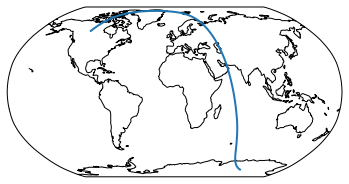

In [8]:
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()

ax.plot(cloudsat_lons, cloudsat_lats, linewidth=2, transform=ccrs.PlateCarree());

Similarly, create another plot with a different projection and limited domain

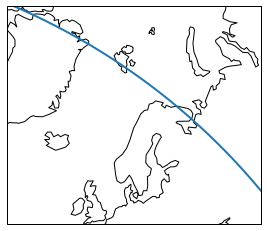

In [9]:
fig = plt.figure()

ax = fig.add_subplot(111, projection=ccrs.Stereographic())
ax.coastlines()
ax.set_extent([-30, 50, 50, 85], crs=ccrs.PlateCarree())

ax.plot(cloudsat_lons, cloudsat_lats, linewidth=2, transform=ccrs.PlateCarree());

## Subsetting data

Define a bounding box - a tuple of `(lon0, lon1, lat0, lat0)` - to select a subset of CloudSat data

In [10]:
bbox = (-2.5, 10, 71, 80)

Find array indices of those longitude and latitude values of CloudSat track that fall within the bounding box

In [11]:
ii = np.where((cloudsat_lons > bbox[0]) & (cloudsat_lons < bbox[1]) &
              (cloudsat_lats > bbox[2]) & (cloudsat_lats < bbox[3]))[0]
i1, i2 = ii[0], ii[-1]

Print out the first and the last index of that part of the track

In [12]:
i1, i2

(16748, 16917)

Use this indices to define grid in horizontal

In [13]:
cloudsat_x = np.arange(i1, i2, dtype=np.float32)

Define the **target** vertical grid: from `cloudsat_z0` to `cloudsat_z1` (in kilometres), `cloudsat_nz` levels.

In [14]:
cloudsat_z0 = 0  # km
cloudsat_z1 = 6  # km
cloudsat_nz = 500  # Number of pixels (levels) in the vertical.
# cloudsat_z = np.linspace(cloudsat_z0, cloudsat_z1, cloudsat_nz)

Create another variable, which is just the original `cloudsat_height` array scaled to kilometres

In [15]:
cloudsat_z = (cloudsat_height * 0.001).astype(np.float32)

Select a subset of the radar reflectivity array (note the indices order!)

In [16]:
cldst_radar = cldst_radar[i1:i2, :]

Intepolate radar reflectivity to regular height levels

In [17]:
cldst_radar = utils.cc_interp2d(cldst_radar.filled(np.nan),
                                cloudsat_x,
                                cloudsat_z, i1, i2, i2-i1,
                                cloudsat_z1, cloudsat_z0, cloudsat_nz).T[::-1,:]

## Plotting radar data

Select a colourmap and normalise it to show desired contour levels

In [18]:
radr_cmap  = plt.cm.magma_r
radr_cmap.set_bad('w')
radr_cmap.set_under('w')
radr_norm = mpl.colors.BoundaryNorm(np.linspace(-20, 30, 6), radr_cmap.N)

Pack all the necessary keywords into a dictionary for convenience

In [19]:
radr_kw = dict(cmap=radr_cmap, norm=radr_norm, rasterized=True)

Create axes and use pseudocolour-mesh method to plot the interpolated radar reflectivity

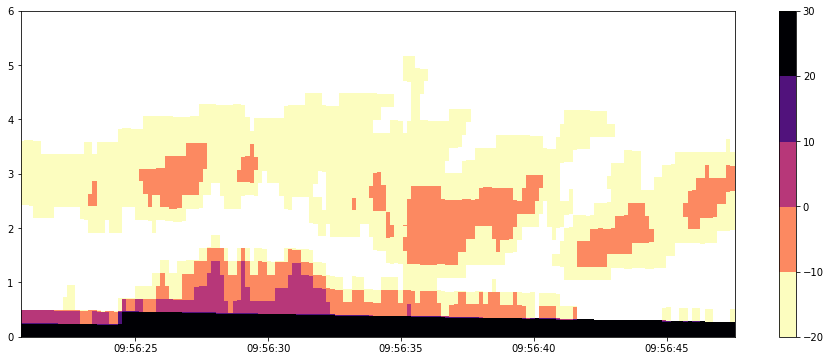

In [20]:
fig, ax = plt.subplots(figsize=(16, 6))
p = ax.pcolormesh(cloudsat_time[i1:i2], np.linspace(cloudsat_z0, cloudsat_z1, cloudsat_nz), cldst_radar, **radr_kw)
fig.colorbar(p);

In [21]:
# class CloudSat:
#     """
#     Handler for reading CloudSat data
#     """
#     def __init__():
#         pass